In [30]:
#pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import string
import time
import re
import random

#### Extracting data from the dataset and storing it globally

In [3]:
# reading from the dataset
filename = "COVID-19_AllResearchPapers_LemmatizedInformation.csv"  # path to CSV file

# read the dataset into variable
df = pd.read_csv(filename)

# extract article ID and content from the dataset
articleTitles = df.iloc[:, 1]  # 2nd column contains article titles
articleTexts = df.iloc[:, 5]  # 6th column contains article content


## **KMP Algorithm**

#### Implementation of KMP search and lps (preprocessing function)

In [9]:
# function to perform the actual KMP search
def kmp_search(text, pattern):
    # array to contain indices of text where matches were found
    matches = []
    
    # call compute_lps to return lps[] after preprocessing the pattern
    lps = getLps(pattern)

    i = 0
    j = 0
    
    # perform KMP search
    while i < len(text):
        # if current char in pattern matches the text
        # casefold() is used to ensure case-insensitiveness
        if text[i].casefold() == pattern[j].casefold():
            i += 1
            j += 1
            
        # if j exceeds len(pattern), it implies that a match is found
        if j == len(pattern):
            # match found at index (i-j)
            matches.append(i - j)

            # j becomes lps[j-1]
            # this avoids checking previous characters 
            # of the pattern that we know are going to match
            j = lps[j - 1]
            
        # in case of mismatch   
        elif i < len(text) and text[i].casefold() != pattern[j].casefold():
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1

    return matches

# function to "preprocess" the pattern
# returns lps array, where each element contains the length of 
# the lps at the previous index
# lps = longest proper prefix that's also a suffix
def getLps(pattern):
    # initialize lps array with 0s
    lps = [0] * len(pattern)
    
    # variable to keep track of length of the longest lps at every index i
    mylen = 0
    
    i = 1
    
    # loop to calculate the length of longest lps at every index i
    while i < len(pattern):
        # casefold() is used to ensure case-insensitiveness
        if pattern[i].casefold() == pattern[mylen].casefold():
            mylen += 1
            # update lps[i] with mylen -> length of largest lps at index i
            lps[i] = mylen
            i += 1
        else:
            if mylen != 0:
                mylen = lps[mylen - 1]
            else:
                lps[i] = 0
                i += 1

    return lps

#### Testing to see if the algorithm works

In [11]:
# testing the algorithm

# take input
pattern = input("Enter text to match")

# array to contain names of songs that had occurrences of the pattern
matchedArticles = []

# calculate start time
startTime = time.perf_counter()

# iterate lyrics for ALL the songs in the dataset
for i in range(len(articleTexts)):
    # get song lyrics from the dataframe
    text = articleTexts[i]

    # perform KMP search to find occurrences of the pattern 
    # in this song
    matches = kmp_search(text, pattern)

# if there are matches, add the song's name 
# in the list of matched_titles
    if matches:
        matchedArticles.append(articleTitles[i])

print("Articles related to \"%s\" found in %2d articles." %(pattern, len(matchedArticles)))
print("Article titles:")
print(matchedArticles)


Articles related to "Over the past decades, infectious disease outbreaks routinely devastated the world's urban and suburban population. The release of anthrax in 2001, the Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002, and recent H1N1 swine flu outbreaks in 2009 are examples [1, 2, 3] . Lessons learned from those outbreaks include development of disease specific vaccines and effective outbreak detection algorithms that can be employed in biosurveillance systems [2, 4, 5] ." found in  1 articles.
Article titles:
['Spatial and Temporal Algorithm Evaluation for Detecting Over-The-Counter Thermometer Sale Increasing during 2009 H1N1 Pandemic Spatial and Temporal Algorithm Evaluation for Detecting Over-The-Counter Thermometer Sale Increases during 2009 H1N1 Pandemic']


### **TEST 1:** _Testing and Plotting KMP with varying lengths (m) of Pattern, and keeping text (n) constant_

In [16]:
# TEST FUNCTION 1
# function to test the KPM algorithm with varying pattern length
# returns dictionary containing length of pattern (m) and elapsed time
def testKPMSearch(pattern):
    # calculate start time
    startTime = time.perf_counter()

    # for now only use one text from the dataset (keeping n constant)
    text = articleTexts[100]
    matches = kmp_search(text, pattern)

    # end time
    endTime = time.perf_counter()

    # calculate elapsed time
    elapsedTime = (endTime - startTime)

    # return dictionary containing length of pattern (m) and time elapsed (in micro seconds)
    return {"m": len(pattern), "elapsedTime": round(elapsedTime*100000, 2)}

In [14]:
#print(articleTexts[500])

INTRODUCTION

In 2012, a new human disease called Middle East respiratory syndrome (MERS), having a high mortality rate, emerged in the Middle East. It was caused by a virus that was originally called human coronavirus-Erasmus Medical Center/ 2012 (HCoV-EMC/2012), but was later renamed as Middle East respiratory syndrome coronavirus (MERS-CoV). 1 MERS-CoV is comparable to severe acute respiratory syndrome coronavirus (SARS-CoV), which killed almost 10% of the affected individuals in China between 2002 and 2003. 2 The first MERS patient reported in Saudi Arabia in June 2012 was possibly infected by direct or indirect transmission of the virus from dromedary camels. 3, 4 Moreover, MERS-CoV similar to the isolates from dromedary camels and humans was found in bats. 3 Evidence suggests that MERS-CoV can be transmitted to humans via both animals and humans. 5 However, the successive epidemics of MERS indicate that the pathogen has spread to various parts of the world predominantly via inter

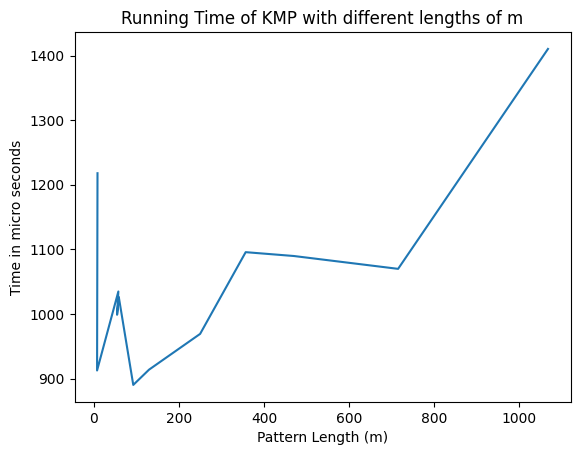

In [129]:
# Test 1: Keeping n constant, and m variable
# We'll only go through one text of length n
# and test with patterns of varying lengths, denoted by m

# define patterns of varying lengths m
patterns = ["Phylogeny", "sars-cov", "Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002", "public health officials are concerned about the effects", 
            "Phylogeny of all sequences belonging to the UMRV phylogroup", 
            "Japanese encephalitis virus (JEV) is the most prevalent cause of viral encephalitis worldwide", 
            "genetically linking scFvs with GPI-attachment signal scFvs are expressed in the lipid raft of plasma membrane through a GPI anchor", 
            "Dendritic cell subsets in humans and mice express not only different patterns of toll-like receptors, but they have also partially distinct cytokine profiles. In particular, human mDC1 have a complex and quite unique regulation of cytokine production", 
            "Rabbits were immunized with pCAGGS-HeV F or pCAGGS-HeV G. Serum was collected from the immunized animals and tested in the original (16) MCR assay format. Briefly, 293 T cells transfected with NiV F/G concomitantly with Venus-YFP were infected with pseudotyped NiV and infection was measured 48 hrs post infection by reading the intensity of RFP expression.",
            "Over the past decades, infectious disease outbreaks routinely devastated the world's urban and suburban population. The release of anthrax in 2001, the Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002, and recent H1N1 swine flu outbreaks in 2009 are examples [1, 2, 3] . Lessons learned from those outbreaks include development of disease specific vaccines and effective outbreak detection algorithms that can be employed in biosurveillance systems [2, 4, 5] .", 
        "Coronaviruses, members of the Coronaviridae family and the Coronavirinae subfamily, are found in mammals and birds. 5 Coronaviruses are divided into four genera: α, β, γ and δ. The human coronaviruses HKU1 (strain named after discovery in the Hong Kong University), 7 OC43 (labeled with OC because these viruses are grown in 'Organ Culture'), 8 SARS-CoV and MERS-CoV belong to the genus β. 9 SARS-CoV and MERS-CoV are genetically subgrouped into lineages B and C, respectively. 9 MERS-CoV mainly causes respiratory diseases and systemic disorders. 10 Gastrointestinal symptoms, including diarrhea and queasiness, are also occasionally observed. 11, 12 Most MERS-CoV-infected individuals develop chronic comorbiditie",
        "Saturated solutions of potassium acetate, magnesium chloride, potassium carbonate, magnesium nitrate, sodium chloride, potassium chloride, and potassium sulfate provided stable RH at 23%, 33%, 43%, 61%, 75%, 85%, and 98%, respectively. We also placed a battery-powered computer fan into the chamber to promote airflow and a more rapid establishment of an RH equilibrium.We regulated temperature by incubating the chamber in temperature-controlled rooms (14°C and 37°C), an incubator (25°C), or on a benchtop (19°C). To isolate the effect of temperature at a single RH of 75%, we incubated the chamber at additional temperatures of 22°C, 28°C, 31°C, 34°C, and 40°C. We selected 75% RH for this experiment for the following reasons. First, there were distinct differences in infectivity versus temperature at 75% RH (Fig. 1) . Second, 75% was near the middle of the range (60 to 85% RH) in which we saw the largest virus inactivation. Third, we were able to test a full range of temperatures at 75% RH. A sensor  placed inside the chamber logged the temperature and RH."
        ]
# define x and y axes for the plot
patternLengths = []  # x
elapsedTime = []  # y

# test KPM search for all patterns
for i in range(len(patterns)):
    result = testKPMSearch(patterns[i])
    patternLengths.append(result["m"])
    elapsedTime.append(result["elapsedTime"])
    # print(result)

# print(patternLengths)
# print(elapsedTime)

# plot the graph
plt.plot(patternLengths, elapsedTime)
plt.title("Running Time of KMP with different lengths of m")
plt.xlabel("Pattern Length (m)")
plt.ylabel("Time in micro seconds")

plt.show()

### **TEST 2:** _Testing and plotting KMP with varying lengths (n) of text, keeping pattern length (m) constant_  

In [39]:
# helper method to generate random Index from the dataset
# NOTE: this function is also used in other functions used to test LCS and Rabin-Karp 
def getRandomArticleIndex(): 
    # get random index
    # we'll choose an index between articleIndex and len(articleTexts) - 1
    # to ensure uniqueness
    randomIdx = random.randint(1, len(articleTexts) - 1)

    return randomIdx

In [6]:
# TEST FUNCTION 2
# function to test the KPM algorithm with varying pattern length
# returns dictionary containing length of song lyrics (n), elapsed time and randomIndex
def testKPMSearch2(pattern, articleIndex):
    # for now only use one song lyric
    text = articleTexts[articleIndex]
    textLen = len(text)

     # calculate start time
    startTime = time.perf_counter()

    # perform KMP algorithm
    matches = kmp_search(text, pattern)

    # end time
    endTime = time.perf_counter()

    # calculate elapsed time
    elapsedTime = (endTime - startTime)

    # return dictionary containing length of song lyrics (n), time elapsed (in micro seconds)
    return {"n": textLen, "elapsedTime": round(elapsedTime*100000, 2)}

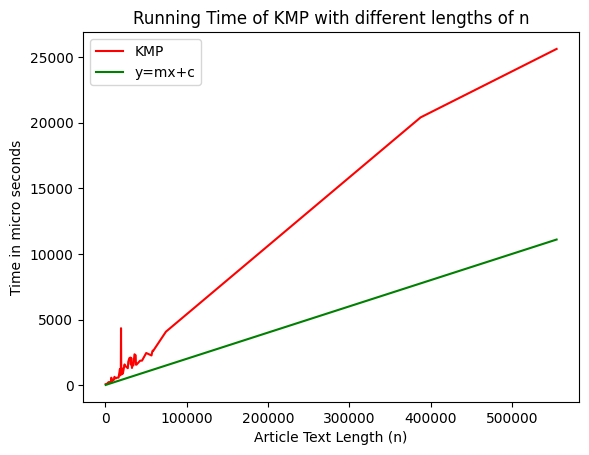

In [353]:
# Test 2: Keeping m constant, and n variable
# We'll  go through different texts of length n
# and test with one pattern of fixed length, denoted by m

# define a pattern of fixed length m
pattern = "in the morning"
# define x and y axes for the plot
articleTextsLengths = []  # x
elapsedTime = []  # y

randomIndex = 0

results = []

# test with 10 different values of n
for i in range(50):
    results.append(testKPMSearch2(pattern, randomIndex))
    randomIndex = getRandomArticleIndex()
   

# sort the dictionary, so that they're in ascending order of n
results = sorted(results, key = lambda d: d["n"])

# add values from the results to plot the graphs
for i in range(len(results)):
    articleTextsLengths.append( results[i]["n"] )
    elapsedTime.append( results[i]["elapsedTime"] )


# print(articleTextsLengths)
# print(elapsedTime)

# plot the KMP graph in red
plt.plot(articleTextsLengths, elapsedTime, color = 'r', label = 'KMP')
plt.title("Running Time of KMP with different lengths of n")

# plot y = mx + c to compare
y = []
for i in range(len(articleTextsLengths)):
    y.append(0.02 * articleTextsLengths[i] + 1)

# plot y = mx + c in green
plt.plot(articleTextsLengths, y, color = 'g', label = 'y=mx+c')

plt.xlabel("Article Text Length (n)")
plt.ylabel("Time in micro seconds")

plt.legend(loc='upper left')

plt.show()

## **LCS Algorithm**

#### Implementing the algorithm

In [40]:
# function to find LCS between two strings using DP
def lcs_length(text, pattern):
    # extract words from the text and pattern
    # these variables will contain an array with words from 
    # the text and the pattern, respectively
    # THIS IS A 2-STEP PROCESS
    # 1. substitute all kinds of punctuation between words with a space ' ' (re.sub())
    # 2. then extract the words using the ' ' as a delimiter (string.split)
    textWords = re.sub('[' + string.punctuation + ']', ' ', text).split()
    patternWords = re.sub('[' + string.punctuation + ']', ' ', pattern).split()

    # get lengths (# of words in the text and pattern)
    # since we'll be iterating over the words of the text and pattern
    m = len(textWords)
    n = len(patternWords)

    # 2d array for memoization table
    DP = [[0] * (n + 1) for i in range(m + 1)]

    wordsFound = []

    # filling the memoization table bottom-up
    # cells in 0th row and column are 0 by default
    # we only look 1st row and 1st column onwards
    # NOTE: DOUBLE CHECK THE BOUNDS FOR THE LOOPS
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # keeping the case-sensitivity of Python in mind, compare the words
            # if the words at these positions match
            if textWords[i - 1].casefold() == patternWords[j - 1].casefold():
                # then value at (i, j) = (value at left diagonal cell) + 1
                DP[i][j] = DP[i - 1][j - 1] + 1
                wordsFound.append(patternWords[j - 1])
                
            
            # else, value at (i, j) = max of value at upper or left cell
            else:
                DP[i][j] = max(DP[i - 1][j], DP[i][j - 1])
                
    #print("Words matched: ", str(wordsFound))
    return DP[m][n]

#### Testing to see if the algorithm works

In [95]:
# array to contain names of songs that had occurrences of the pattern
matchedArticles = []

# take input
pattern = input("enter text to match: ")

# extract words from the pattern
patternWords = re.sub('[' + string.punctuation + ']', ' ', pattern).split()

# iterate over the lyrics for ALL the songs in the dataset
for i in range(len(articleTexts)):
    # get song lyrics from the dataframe
    text = articleTexts[i]

    # compute LCS between the song's lyrics and the pattern
    lcs = lcs_length(text, pattern)

    # if the LCS is equal to the # of words of the pattern, 
    # then the pattern is a substring of the song's lyrics
    if lcs == len(patternWords):
        matchedArticles.append(articleTitles[i])

# print the matched article titles
print("Articles related to \"%s\" found in %2d articles." %(pattern, len(matchedArticles)))
print("Article titles:")
print(matchedArticles)


Articles related to "coronavirus" found in 5562 articles.
Article IDs:
['immunity to pathogens taught by specialized human dendritic cell subsets', nan, 'a section of the journal Frontiers in Pediatrics A Review of Pediatric Critical Care in Resource-Limited Settings: A Look at Past, Present, and Future Directions', 'Stable Occupancy of the Crimean-Congo Hemorrhagic Fever Virus-Encoded Deubiquitinase Blocks Viral Infection', 'GPI-anchored single chain Fv -an effective way to capture transiently-exposed neutralization epitopes on HIV-1 envelope spike', 'Development of a smartphone-based rapid dual fluorescent diagnostic system for the simultaneous detection of influenza A and H5 subtype in avian influenza A-infected patients', 'Chaperone-Mediated Autophagy Protein BAG3 Negatively Regulates Ebola and Marburg VP40-Mediated Egress', 'The Murine Coronavirus Hemagglutinin-esterase Receptor-binding Site: A Major Shift in Ligand Specificity through Modest Changes in Architecture', 'Rational De

In [95]:
pattern = "en then morning i wake up"
patternWords = re.sub('[' + string.punctuation + ']', ' ', pattern).split()

lcs = lcs_length("I wake up early in the morning", pattern)
print(lcs)


if lcs == len(patternWords):
    print("100% Match found")

else:
    percentage = lcs * 100 / len(patternWords)
    print("%0.1f%% match found" %(percentage))

3
50.0% match found


### **TEST 1:** _Testing and Plotting LCS with different lengths of Pattern text (m)_

In [41]:
# TEST FUNCTION 1 FOR LCS
#  function to test LCS, keeping song length (n) constant
# and pattern length (m) variable
def testLCS1(pattern):
    # calculate start time
    startTime = time.perf_counter()

    # for now only use one text (keeping n constant)
    text = articleTexts[0]
    lcs = lcs_length(text, pattern)

    # end time
    endTime = time.perf_counter()

    # calculate elapsed time
    elapsedTime = (endTime - startTime)

    # return dictionary containing length of pattern (m) and time elapsed (in micro seconds)
    return {"m": len(pattern), "elapsedTime": round(elapsedTime*100000, 2)}
    

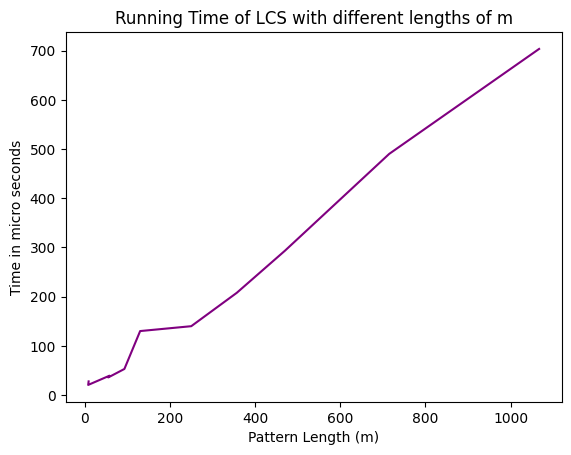

In [137]:
# Test 1: Keeping n constant, and m variable
# We'll only go through one text of length n
# and test with patterns of varying lengths, denoted by m

# define patterns of varying lengths m
patterns = ["Phylogeny", "sars-cov", "Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002", "public health officials are concerned about the effects", 
            "Phylogeny of all sequences belonging to the UMRV phylogroup", 
            "Japanese encephalitis virus (JEV) is the most prevalent cause of viral encephalitis worldwide", 
            "genetically linking scFvs with GPI-attachment signal scFvs are expressed in the lipid raft of plasma membrane through a GPI anchor", 
            "Dendritic cell subsets in humans and mice express not only different patterns of toll-like receptors, but they have also partially distinct cytokine profiles. In particular, human mDC1 have a complex and quite unique regulation of cytokine production", 
            "Rabbits were immunized with pCAGGS-HeV F or pCAGGS-HeV G. Serum was collected from the immunized animals and tested in the original (16) MCR assay format. Briefly, 293 T cells transfected with NiV F/G concomitantly with Venus-YFP were infected with pseudotyped NiV and infection was measured 48 hrs post infection by reading the intensity of RFP expression.",
            "Over the past decades, infectious disease outbreaks routinely devastated the world's urban and suburban population. The release of anthrax in 2001, the Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002, and recent H1N1 swine flu outbreaks in 2009 are examples [1, 2, 3] . Lessons learned from those outbreaks include development of disease specific vaccines and effective outbreak detection algorithms that can be employed in biosurveillance systems [2, 4, 5] .", 
        "Coronaviruses, members of the Coronaviridae family and the Coronavirinae subfamily, are found in mammals and birds. 5 Coronaviruses are divided into four genera: α, β, γ and δ. The human coronaviruses HKU1 (strain named after discovery in the Hong Kong University), 7 OC43 (labeled with OC because these viruses are grown in 'Organ Culture'), 8 SARS-CoV and MERS-CoV belong to the genus β. 9 SARS-CoV and MERS-CoV are genetically subgrouped into lineages B and C, respectively. 9 MERS-CoV mainly causes respiratory diseases and systemic disorders. 10 Gastrointestinal symptoms, including diarrhea and queasiness, are also occasionally observed. 11, 12 Most MERS-CoV-infected individuals develop chronic comorbiditie",
        "Saturated solutions of potassium acetate, magnesium chloride, potassium carbonate, magnesium nitrate, sodium chloride, potassium chloride, and potassium sulfate provided stable RH at 23%, 33%, 43%, 61%, 75%, 85%, and 98%, respectively. We also placed a battery-powered computer fan into the chamber to promote airflow and a more rapid establishment of an RH equilibrium.We regulated temperature by incubating the chamber in temperature-controlled rooms (14°C and 37°C), an incubator (25°C), or on a benchtop (19°C). To isolate the effect of temperature at a single RH of 75%, we incubated the chamber at additional temperatures of 22°C, 28°C, 31°C, 34°C, and 40°C. We selected 75% RH for this experiment for the following reasons. First, there were distinct differences in infectivity versus temperature at 75% RH (Fig. 1) . Second, 75% was near the middle of the range (60 to 85% RH) in which we saw the largest virus inactivation. Third, we were able to test a full range of temperatures at 75% RH. A sensor  placed inside the chamber logged the temperature and RH."
        ]

# define x and y axes for the plot
patternLengths = []  # x
elapsedTime = []  # y

# test KPM search for all patterns
for i in range(len(patterns)):
    result = testLCS1(patterns[i])
    patternLengths.append(result["m"])
    elapsedTime.append(result["elapsedTime"])
    # print(result)

# print(patternLengths)
# print(elapsedTime)

# plot the graph
plt.plot(patternLengths, elapsedTime, color="purple")
plt.title("Running Time of LCS with different lengths of m")
plt.xlabel("Pattern Length (m)")
plt.ylabel("Time in micro seconds")

plt.show()

### **TEST 2:** _Testing and Plotting LCS with varying lengths of text (n)_

In [9]:
# TEST FUNCTION 2
# function to test the LCS algorithm with varying pattern length
# returns dictionary containing length of song lyrics (n), elapsed time and randomIndex
def testLCS2(pattern, articleIndex):
    # for now only use one song lyric
    text = articleTexts[articleIndex]
    textLen = len(text)

    # calculate start time
    startTime = time.perf_counter()

    # perform LCS
    lcs = lcs_length(text, pattern)

    # end time
    endTime = time.perf_counter()

    # calculate elapsed time
    elapsedTime = (endTime - startTime)

    # return dictionary containing length of song lyrics (n), time elapsed (in micro seconds) and randomIndex
    return {"n": textLen, "elapsedTime": round(elapsedTime*100000, 2)}

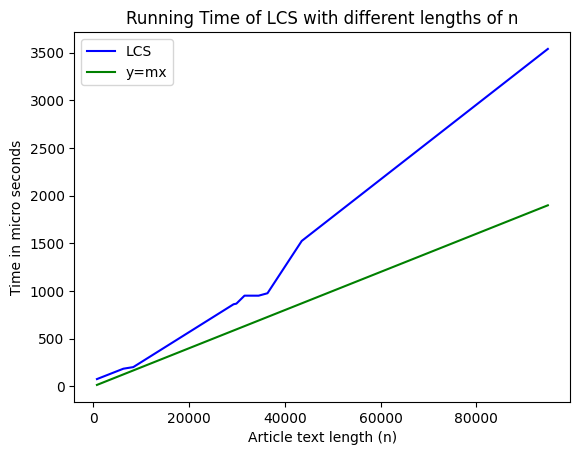

In [236]:
# Test 2: Keeping m constant, and n variable
# We'll  go through different texts of length n
# and test with one pattern of fixed length, denoted by m

# define a pattern of fixed length m
pattern = "public health officials"

# define x and y axes for the plot
articleTextsLengths = []  # x
elapsedTime = []  # y

randomIndex = 0

results = []

# test with 10 different values of n
for i in range(10):
    results.append(testLCS2(pattern, randomIndex))
    randomIndex = getRandomArticleIndex()
   
# sort the results (dictionary), so that they're in ascending order of n
results = sorted(results, key = lambda d: d["n"])

# add values from the results to plot the graphs
for i in range(len(results)):
    articleTextsLengths.append( results[i]["n"] )
    elapsedTime.append( results[i]["elapsedTime"] )


# print(articleTextsLengths)
# print(elapsedTime)

# plot the LCS graph in red
plt.plot(articleTextsLengths, elapsedTime, color = 'b', label = 'LCS')
plt.title("Running Time of LCS with different lengths of n")

# plot y = mx to compare
y = []
for i in range(len(articleTextsLengths)):
    y.append(0.02 * articleTextsLengths[i])

# plot y = mx + c in green
plt.plot(articleTextsLengths, y, color = 'g', label = 'y=mx')

plt.xlabel("Article text length (n)")
plt.ylabel("Time in micro seconds")

plt.legend(loc='upper left')

plt.show()

## **Rabin-Karp Algorithm**

#### Implementing the algorithm

In [45]:
# function to perform Rabin-Karp search
def rabin_karp_search(text, pattern):
    N = len(text)
    M = len(pattern)
    
    # to calculate hash values for text and pattern
    textHash = 0    
    patternHash = 0    

    # variables used to calculate hash values
    d = 256  # since there are total 256 characters
    q = 101
    h = 1 # h = d^(M-1) % q

    # Calculate the hash value of pattern and first window of text
    for i in range(M - 1):
        h = (h * d) % q

    for i in range(M):
        # calculate hash values for pattern and current text substring
        patternHash = ((d * patternHash) + ord(pattern[i])) % q
        textHash = ((d * textHash)+ ord(text[i])) % q
 
    # Slide the pattern over the text one by one
    for i in range(N - M + 1):
        # if hash values of the current window of text and pattern match
        if textHash == patternHash:
            # then compare the characters one by one
            for j in range(M):
                if text[i + j] != pattern[j]:
                    break

            j += 1
            # if textHash == patternHash and pattern[0...M-1] = text[i, i+1, ...i+M-1]
            if j == M:
                return True
 
        # Calculate hash value for next window of text by remove leading digit and add the trailing one
        if i < N - M:
            textHash = (d * (textHash - ord(text[i]) * h) + ord(text[i + M])) % q
            # If t < 0, convert it to a positive value
            if textHash < 0:
                textHash = textHash + q

    # return false if no matches found
    return False

#### Testing to see if the algorithm works

In [272]:
# take input
pattern = input("enter text to match: ")

# array to contain names of songs that had occurrences of the pattern
matchedArticles = []

# iterate lyrics for ALL the songs in the dataset
for i in range(len(articleTexts)):
    # this dataset is a bit buggy
    while(len(articleTexts[i]) < len(pattern)):
        i += 1
        
    # get song lyrics from the dataframe
    text = articleTexts[i]

    # perform Rabin-Karp search to find occurrences of the pattern 
    # in this song
    if rabin_karp_search(text, pattern):
        matchedArticles.append(articleTitles[i])


print("Articles related to \"%s\" found in %2d articles." %(pattern, len(matchedArticles)))
print("Article titles:")
print(matchedArticles)

Articles related to "public health" found in 3262 articles.
Article titles:
['Public Health Responses to and Challenges for the Control of Dengue Transmission in High-Income Countries: Four Case Studies', 'a section of the journal Frontiers in Pediatrics A Review of Pediatric Critical Care in Resource-Limited Settings: A Look at Past, Present, and Future Directions', 'The fecal microbiota and unconjugated fecal bile acids in dogs with diabetes mellitus ESCG-O-2 Impact of antibiotic administration on fecal bacterial groups potentially associated with dysbiosis in kittens ESCG-O-3 Fecal microbial metabolism is altered in dogs with chronic enteropathy ESCG-O-4 The pug breed demonstrates a worse response to treatment of protein-losing enteropathy than other breeds of dog ESCG-O-6 Dogs with acute haemorrhagic diarrhoea syndrome not receiving antibiotics have a good prognosis despite initial high AHDS-score and systemic inflammation ESCG-O-7 Faecal bile acid profiles in dogs with acute haemo

In [262]:
if rabin_karp_search(articleTexts[0], "UMRV"):
    print("Match found")
else:
    print("No match found")

Match found


### **TEST 1:** _Testing Rabin-Karp Algorithm with different values of pattern length (m)_

In [75]:
# TEST FUNCTION 1 FOR Rabin-Karp Algorithm
#  function to test Rabin-Karp Algorithm, keeping song length (n) constant
# and pattern length (m) variable
def testRabinKarp1(pattern):
    # calculate start time
    startTime = time.perf_counter()

    # for now only use one text (keeping n constant)
    text = articleTexts[10000]
    rabin_karp_search(text, pattern)

    # end time
    endTime = time.perf_counter()

    # calculate elapsed time
    elapsedTime = (endTime - startTime)

    # return dictionary containing length of pattern (m) and time elapsed (in micro seconds)
    return {"m": len(pattern), "elapsedTime": round(elapsedTime*100000, 2)}
    

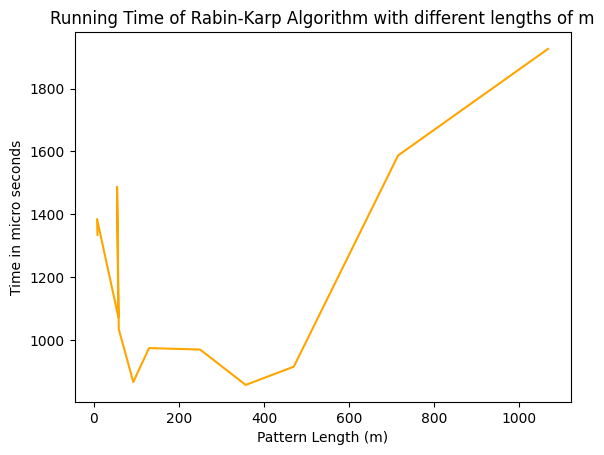

In [170]:
# Test 1: Keeping n constant, and m variable
# We'll only go through one text of length n
# and test with patterns of varying lengths, denoted by m

# define patterns of varying lengths m
patterns = ["Phylogeny", "sars-cov", "Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002", "public health officials are concerned about the effects", 
            "Phylogeny of all sequences belonging to the UMRV phylogroup", 
            "Japanese encephalitis virus (JEV) is the most prevalent cause of viral encephalitis worldwide", 
            "genetically linking scFvs with GPI-attachment signal scFvs are expressed in the lipid raft of plasma membrane through a GPI anchor", 
            "Dendritic cell subsets in humans and mice express not only different patterns of toll-like receptors, but they have also partially distinct cytokine profiles. In particular, human mDC1 have a complex and quite unique regulation of cytokine production", 
            "Rabbits were immunized with pCAGGS-HeV F or pCAGGS-HeV G. Serum was collected from the immunized animals and tested in the original (16) MCR assay format. Briefly, 293 T cells transfected with NiV F/G concomitantly with Venus-YFP were infected with pseudotyped NiV and infection was measured 48 hrs post infection by reading the intensity of RFP expression.",
            "Over the past decades, infectious disease outbreaks routinely devastated the world's urban and suburban population. The release of anthrax in 2001, the Severe Acute Respiratory Syndrome (SARS) outbreaks in 2002, and recent H1N1 swine flu outbreaks in 2009 are examples [1, 2, 3] . Lessons learned from those outbreaks include development of disease specific vaccines and effective outbreak detection algorithms that can be employed in biosurveillance systems [2, 4, 5] .", 
        "Coronaviruses, members of the Coronaviridae family and the Coronavirinae subfamily, are found in mammals and birds. 5 Coronaviruses are divided into four genera: α, β, γ and δ. The human coronaviruses HKU1 (strain named after discovery in the Hong Kong University), 7 OC43 (labeled with OC because these viruses are grown in 'Organ Culture'), 8 SARS-CoV and MERS-CoV belong to the genus β. 9 SARS-CoV and MERS-CoV are genetically subgrouped into lineages B and C, respectively. 9 MERS-CoV mainly causes respiratory diseases and systemic disorders. 10 Gastrointestinal symptoms, including diarrhea and queasiness, are also occasionally observed. 11, 12 Most MERS-CoV-infected individuals develop chronic comorbiditie",
        "Saturated solutions of potassium acetate, magnesium chloride, potassium carbonate, magnesium nitrate, sodium chloride, potassium chloride, and potassium sulfate provided stable RH at 23%, 33%, 43%, 61%, 75%, 85%, and 98%, respectively. We also placed a battery-powered computer fan into the chamber to promote airflow and a more rapid establishment of an RH equilibrium.We regulated temperature by incubating the chamber in temperature-controlled rooms (14°C and 37°C), an incubator (25°C), or on a benchtop (19°C). To isolate the effect of temperature at a single RH of 75%, we incubated the chamber at additional temperatures of 22°C, 28°C, 31°C, 34°C, and 40°C. We selected 75% RH for this experiment for the following reasons. First, there were distinct differences in infectivity versus temperature at 75% RH (Fig. 1) . Second, 75% was near the middle of the range (60 to 85% RH) in which we saw the largest virus inactivation. Third, we were able to test a full range of temperatures at 75% RH. A sensor  placed inside the chamber logged the temperature and RH."
        ]
# define x and y axes for the plot
patternLengths = []  # x
elapsedTime = []  # y

# test KPM search for all patterns
for i in range(len(patterns)):
    result = testRabinKarp1(patterns[i])
    patternLengths.append(result["m"])
    elapsedTime.append(result["elapsedTime"])
    # print(result)

# print(patternLengths)
# print(elapsedTime)

# plot the graph
plt.plot(patternLengths, elapsedTime, color="orange")
plt.title("Running Time of Rabin-Karp Algorithm with different lengths of m")
plt.xlabel("Pattern Length (m)")
plt.ylabel("Time in micro seconds")

plt.show()

### **TEST 2:** _Testing Rabin-Karp with different values of text length n_

In [274]:
# TEST FUNCTION 2
# function to test the LCS algorithm with varying pattern length
# returns dictionary containing length of song lyrics (n), elapsed time and randomIndex
def testRabinKarp2(pattern, articleIndex):  
    # get the song at the index
    text = articleTexts[articleIndex]
    textLen = len(text)

    # calculate start time
    startTime = time.perf_counter()

    # perform Rabin-Karp Algorithm
    rabin_karp_search(text, pattern)

    # end time
    endTime = time.perf_counter()

    # calculate elapsed time
    elapsedTime = (endTime - startTime)

    # return dictionary containing length of song lyrics (n), time elapsed (in micro seconds) and randomIndex
    return {"n": textLen, "elapsedTime": round(elapsedTime*100000, 2)}

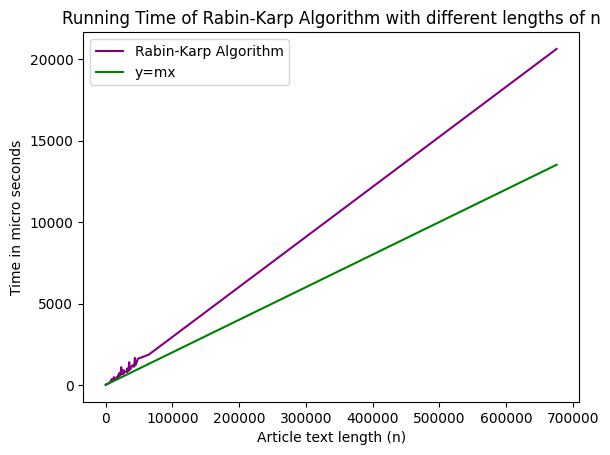

In [332]:
# Test 2: Keeping m constant, and n variable
# We'll  go through different texts of length n
# and test with one pattern of fixed length, denoted by m

# define a pattern of fixed length m
pattern = "wake up in the morning"

# define x and y axes for the plot
articleTextsLengths = []  # x
elapsedTime = []  # y

randomIndex = 0

results = []

# test with 10 different values of n
for i in range(50):
    # bug-fix for the dataset
    # only happens when performing Rabin-Karp
    # in the dataset, some texts (only 7%) are incomplete and have length less than pattern
    # so this causes error in Rabin-Karp
    while(len(articleTexts[randomIndex]) < len(pattern)):
        randomIndex = getRandomArticleIndex()

    results.append(testRabinKarp2(pattern, randomIndex))
    randomIndex = getRandomArticleIndex()
   
# sort the results (dictionary), so that they're in ascending order of n
results = sorted(results, key = lambda d: d["n"])

# add values from the results to plot the graphs
for i in range(len(results)):
    articleTextsLengths.append( results[i]["n"] )
    elapsedTime.append( results[i]["elapsedTime"] )


# print(articleTextsLengths)
# print(elapsedTime)

# plot the Rabin-Karp graph in purple
plt.plot(articleTextsLengths, elapsedTime, color = 'purple', label = 'Rabin-Karp Algorithm')
plt.title("Running Time of Rabin-Karp Algorithm with different lengths of n")

# plot y = mx to compare
y = []
for i in range(len(articleTextsLengths)):
    y.append(0.02 * articleTextsLengths[i])

# plot y = mx + c in green
plt.plot(articleTextsLengths, y, color = 'g', label = 'y=mx')

plt.xlabel("Article text length (n)")
plt.ylabel("Time in micro seconds")

plt.legend(loc='upper left')

plt.show()

## **KMP vs LCS vs Rabin-Karp Algorithm**

#### _Testing the performance with different values of text length (n)_

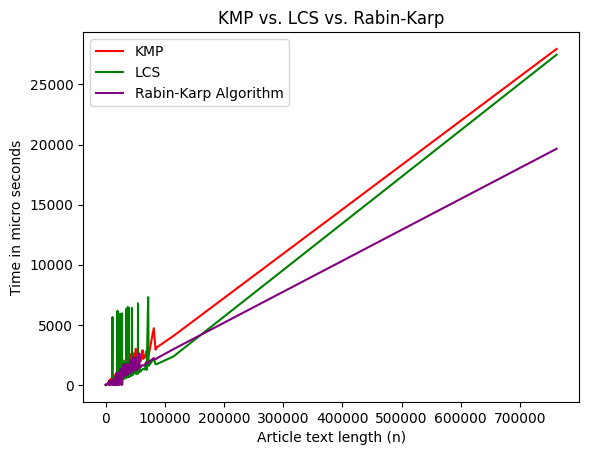

In [403]:
# define a pattern of fixed length m
pattern = "2019-nCoV"

# define x and y axes for the plot
articleTextsLengths = []  # x
KMP_elapsedTime = []  
LCS_elapsedTime = []  
RabinKarp_elapsedTime = []  

randomIndex = 0

# define 3arrays to contain results of the 3 algorithms
KMP_results = []
LCS_results = []
RabinKarp_results = []

# run 10 tests each for the 3 algorithms
# REMINDER: text length n is differing
# test with 10 different values of n
for i in range(500):
    # bug-fix for the dataset
    while(len(articleTexts[randomIndex]) < len(pattern)):
        randomIndex = getRandomArticleIndex()

    # run test for KMP
    KMP_results.append(testKPMSearch2(pattern, randomIndex))

    # run test for LCS
    LCS_results.append(testLCS2(pattern, randomIndex))

    # run test for Rabin-Karp algorithm
    RabinKarp_results.append(testRabinKarp2(pattern, randomIndex))

    randomIndex = getRandomArticleIndex()

# sort the results generated for all 3 algorithms (dictionary), so that they're in ascending order of n
KMP_results = sorted(KMP_results, key = lambda d: d["n"])
LCS_results = sorted(LCS_results, key = lambda d: d["n"])
RabinKarp_results = sorted(RabinKarp_results, key = lambda d: d["n"])

# PLOTTING GRAPHS FOR THE 3 ALGORITHMS

# add values from the results to plot the graphs
for i in range(len(KMP_results)):
    # points on the x-axis for the 3 graphs remains the same
    articleTextsLengths.append( KMP_results[i]["n"] )

    KMP_elapsedTime.append( KMP_results[i]["elapsedTime"] )

    LCS_elapsedTime.append( LCS_results[i]["elapsedTime"] )
    
    RabinKarp_elapsedTime.append( RabinKarp_results[i]["elapsedTime"] )



# plotting the KMP graph in red
plt.plot(articleTextsLengths, KMP_elapsedTime, color = 'red', label = 'KMP')

# plotting the LCS graph in green
plt.plot(articleTextsLengths, LCS_elapsedTime, color = 'green', label = 'LCS')

# plotting the Rabin-Karp graph in purple
plt.plot(articleTextsLengths, RabinKarp_elapsedTime, color = 'purple', label = 'Rabin-Karp Algorithm')


plt.xlabel("Article text length (n)")
plt.ylabel("Time in micro seconds")
plt.title("KMP vs. LCS vs. Rabin-Karp")

plt.legend(loc='upper left')

plt.show()